In [111]:
import pandas as pd
import numpy as np
import matplotlib_inline
import matplotlib.pyplot as plt

In [112]:
results = pd.read_csv("/content/drive/MyDrive/football_results.csv")

In [113]:
int_results = results[(results['level'] == 'international') & (results['home_continent']=='Europe') &(results['away_continent']=='Europe')]
int_res = int_results.drop(['full_time','home_continent','away_continent','continent','level','home_ident','away_ident'],axis=1)
int_res=int_res[(int_res['competition']=='UEFA EL') | (int_res['competition']=='UEFA CL')]
int_res2018 = int_res[int_res['date'].str.startswith('2018')]

In [114]:
int_res['score']=int_res['gh']-int_res['ga']
int_res.loc[int_res['score'] > 0, 'score'] = 1
int_res.loc[int_res['score'] == 0, 'score'] = 0
int_res.loc[int_res['score'] < 0, 'score'] = -1

In [115]:
int_res.to_csv('/content/drive/MyDrive/International club competitions.csv')

In [116]:
int_res2018 = int_res[int_res['date'].str.startswith('2018')]
int_res['home_country']=int_res.home_country.str.capitalize()
int_res2018['home_country']=int_res2018.home_country.str.capitalize()
val = int_res2018.groupby('home_country')['score'].sum().values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [117]:
rank = pd.read_csv('/content/drive/MyDrive/fifa_ranking.csv')
rank2018 = rank[(rank['rank_date'].str.startswith('2018')) & (rank['confederation']=='UEFA')]
avg_rank2018 = rank2018.groupby('country_full').mean()['rank']
rankval = np.log(avg_rank2018).values


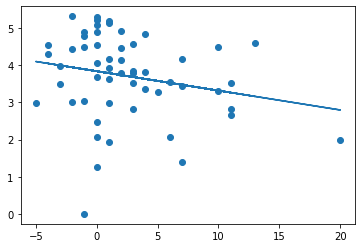

In [118]:
m,b = np.polyfit(val,rankval,1) 
plt.scatter(val,rankval)
plt.plot(val, m*val + b)